# 2: Moving onto NetworkX + Basic Social Net with networkx

networkx is a 3rd party library that allows the creation visualisation and analysis of graphs using graph theory.

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import networkx as nx

Networkx allows us to represent multiple types of graph, such as undirected, directed, multigraphs and more

In [2]:
from mcfinance import Extractor as ex

In [65]:
G = nx.DiGraph()

We can add the information as an adjacency list

In [66]:
graph = {
  'A': [('B', 4), ('C', 2)],
  'B': [('C', 1), ('D', 2), ('E', 3)], 
  'C': [('B', 1), ('D', 4), ('E', 5)],
  'D': [],
  'E': [('D',1)]
}

In [67]:
for node in graph:
    for k in graph[node]:
        G.add_edge(node, k[0], weight= k[1])

In [68]:
print(G.edges())

[('A', 'B'), ('A', 'C'), ('B', 'C'), ('B', 'D'), ('B', 'E'), ('C', 'B'), ('C', 'D'), ('C', 'E'), ('E', 'D')]


### Networkx allows us to display graphs as per our specifications using pyplot.

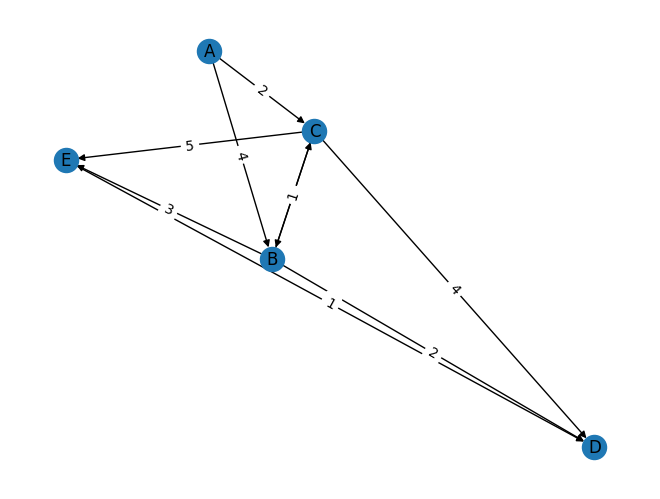

In [69]:
pos = nx.spring_layout(G) 

nx.draw(G, pos, with_labels=True, )

edge_labels = dict([((u,v,), d['weight']) for u,v,d in G.edges(data=True)])
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.show()

In [70]:
print(nx.shortest_path_length(G, 'A'))

{'A': 0, 'B': 1, 'C': 1, 'D': 2, 'E': 2}


Using networkx we can also get degrees of nodes

In [71]:
print(G)
print(G.in_degree)
print(G.out_degree)

DiGraph with 5 nodes and 9 edges
[('A', 0), ('B', 2), ('C', 2), ('D', 3), ('E', 2)]
[('A', 2), ('B', 3), ('C', 3), ('D', 0), ('E', 1)]


### Centrality Measures

Let us load a sample network of friends
Nodes:
Aryan
Adya 
Vijay 
Ragha
Abhay
Abhishek
Akash
Anu
Balaji
The weights could represent number of interactions and the direction.


In [72]:
social_g = {
  'Aryan': [('Adya', 4), ('Vijay', 2), ('Ragha', 1)],
  'Adya': [('Aryan', 1), ('Vijay', 2), ('Abhishek', 3)], 
  'Abhay': [('Aryan', 1), ('Abhishek', 4), ('Anu', 5)],
  'Abhishek': [('Adya', 2), ('Vijay', 3)],
  'Akash': [('Balaji',1), ('Ragha', 5)],
  'Vijay': [('Abhay', 1), ('Adya', 4), ('Abhishek', 5)],
  'Ragha': [('Aryan', 1), ('Abhay', 4), ('Vijay', 5)],
  'Anu': [('Balaji', 1), ('Aryan', 4)],
  'Balaji': [('Adya', 1), ('Aryan', 4), ('Abhay', 5)],
}

In [73]:
Social = nx.DiGraph()

In [74]:
for node in social_g:
    for k in social_g[node]:
        Social.add_edge(node, k[0], weight= k[1])

In [75]:
print(Social.edges())

[('Aryan', 'Adya'), ('Aryan', 'Vijay'), ('Aryan', 'Ragha'), ('Adya', 'Aryan'), ('Adya', 'Vijay'), ('Adya', 'Abhishek'), ('Vijay', 'Abhay'), ('Vijay', 'Adya'), ('Vijay', 'Abhishek'), ('Ragha', 'Aryan'), ('Ragha', 'Abhay'), ('Ragha', 'Vijay'), ('Abhishek', 'Adya'), ('Abhishek', 'Vijay'), ('Abhay', 'Aryan'), ('Abhay', 'Abhishek'), ('Abhay', 'Anu'), ('Anu', 'Balaji'), ('Anu', 'Aryan'), ('Akash', 'Balaji'), ('Akash', 'Ragha'), ('Balaji', 'Adya'), ('Balaji', 'Aryan'), ('Balaji', 'Abhay')]


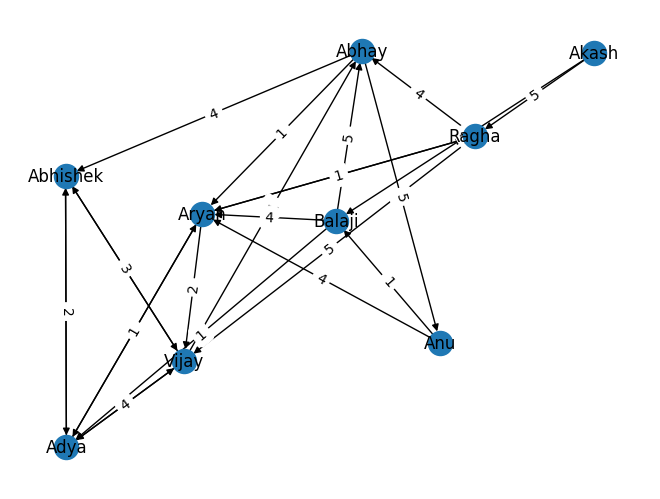

In [76]:
pos = nx.spring_layout(Social) 

nx.draw(Social, pos, with_labels=True, )

edge_labels = dict([((u,v,), d['weight']) for u,v,d in Social.edges(data=True)])
nx.draw_networkx_edge_labels(Social, pos, edge_labels=edge_labels)

plt.show()

# Using different centrality measures we can find the influence each node has on a network.

In [78]:
print(nx.degree_centrality(Social))
print(nx.in_degree_centrality(Social))
print(nx.out_degree_centrality(Social))
print(nx.betweenness_centrality(Social, weight='weight'))
print(nx.eigenvector_centrality(Social, weight='weight'))

{'Aryan': 1.0, 'Adya': 0.875, 'Vijay': 0.875, 'Ragha': 0.625, 'Abhishek': 0.625, 'Abhay': 0.75, 'Anu': 0.375, 'Akash': 0.25, 'Balaji': 0.625}
{'Aryan': 0.625, 'Adya': 0.5, 'Vijay': 0.5, 'Ragha': 0.25, 'Abhishek': 0.375, 'Abhay': 0.375, 'Anu': 0.125, 'Akash': 0.0, 'Balaji': 0.25}
{'Aryan': 0.375, 'Adya': 0.375, 'Vijay': 0.375, 'Ragha': 0.375, 'Abhishek': 0.25, 'Abhay': 0.375, 'Anu': 0.25, 'Akash': 0.25, 'Balaji': 0.375}
{'Aryan': 0.23660714285714285, 'Adya': 0.34970238095238093, 'Vijay': 0.2976190476190476, 'Ragha': 0.0, 'Abhishek': 0.0, 'Abhay': 0.2738095238095238, 'Anu': 0.10714285714285714, 'Akash': 0.0, 'Balaji': 0.23214285714285712}
{'Aryan': 0.13815929665732182, 'Adya': 0.5527986039631355, 'Vijay': 0.493846202588715, 'Ragha': 0.019933048986930213, 'Abhishek': 0.6471376867601847, 'Abhay': 0.08946979776200442, 'Anu': 0.06454125818626984, 'Akash': 1.8300069897367546e-19, 'Balaji': 0.009311799245550745}
